## I. Perkenalan
Nama : Fadhilah Amani Alam Aulia

Batch : 15

Dataset: Informasi penggunaan kartu kredit selama 6 bulan terakhir

Objective : Membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit selama 6 bulan terakhir dari sebuah bank

Query : 

    SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_015_rmt.credit-card-information` WHERE MOD (CUST_ID, 2) != 0

## II. Import Libraries

In [2]:
# Mengimport library yang dibutuhkan

import joblib
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

## III. Data Loading

In [3]:
# Mengakses dataset

data = pd.read_csv('h8dsft_P1G4_fadhilah_amani_alam_aulia.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [4]:
# Melihat 10 baris pertama pada data

data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


In [5]:
# Melihat 10 baris terakhir pada data

data.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


In [6]:
# Mengganti nama kolom 'CUST_ID' menjadi 'CUSTOMER_ID'

data.rename({'CUST_ID':'CUSTOMER_ID'},axis=1,inplace=True)
data

,CUSTOMER_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [7]:
# Melihat describe data

data.describe()

,CUSTOMER_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Melihat ukuran dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUSTOMER_ID                       4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

<p align='justify'>Berdasarkan data di atas, dapat diketahui bahwa dataset ini terdiri dari 4475 baris dan 18 kolom. Dataset ini memiliki data type float64 dan int64 serta memakan memori sebesar 629.4 KB.</p>

## IV. Exploratory Data Analysis (EDA)

In [9]:
# Melihat nilai data masing-masing kolom

for col in data:
    print(col, data[col].unique())
    print('')

CUSTOMER_ID [3091 5069 6075 ... 7347 8447 1995]

BALANCE [   3.833185    0.        757.964752 ... 1322.818587 1060.391273
 3447.674222]

BALANCE_FREQUENCY [0.125    0.       0.875    0.375    1.       0.454545 0.727273 0.545455
 0.363636 0.909091 0.272727 0.625    0.636364 0.818182 0.181818 0.5
 0.833333 0.7      0.3      0.6      0.25     0.75     0.090909 0.888889
 0.285714 0.428571 0.142857 0.571429 0.2      0.4      0.9      0.8
 0.333333 0.666667 0.444444 0.166667 0.555556 0.714286 0.857143 0.777778
 0.1      0.222222 0.111111]

PURCHASES [ 45.   176.03 157.4  ... 797.5  285.07 205.  ]

ONEOFF_PURCHASES [ 45.   176.03 157.4  ... 577.83 285.07 205.  ]

INSTALLMENTS_PURCHASES [  0.   178.15 114.   ... 482.68  92.07 219.67]

CASH_ADVANCE [   0.       1982.368623 1175.358928 ...  762.301096 1475.858013
 4548.057776]

PURCHASES_FREQUENCY [0.125    0.25     0.375    0.5      0.625    0.75     0.875    1.
 0.090909 0.181818 0.363636 0.142857 0.285714 0.083333 0.727273 0.555556
 0.571429 

Pada dataset ini terdapat beberapa kolom yang memiliki nilai dari 0 hingga 1. Kolom-kolom tersebut adalah:
- 'BALANCE_FREQUENCY'<br>
    Merupakan kolom yang berisi nilai seberapa sering saldo diperbarui. Semakin nilai mendekati 0 maka berarti saldo tidak sering diperbarui, dan jika semakin mendekati 1 maka berarti saldo sering diperbarui.
- 'PURCHASES_FREQUENCY'<br>
    Merupakan kolom yang berisi nilai seberapa sering pembelian dilakukan. Semakin nilai mendekati 0 maka berarti tidak sering melakukan pembelian, dan jika semakin mendekati 1 maka berarti sering melakukan pembelian.
- 'ONEOFF_PURCHASES_FREQUENCY'<br>
    Merupakan kolom yang berisi nilai seberapa sering pembelian dilakukan dalam sekali jalan. Semakin nilai mendekati 0 maka berarti tidak sering melakukan pembelian, dan jika semakin mendekati 1 maka berarti sering melakukan pembelian.
- 'PURCHASES_INSTALLMENTS_FREQUENCY'<br>
    Merupakan kolom yang berisi nilai seberapa sering pembelian cicilan dilakukan. Semakin nilai mendekati 0 maka berarti tidak sering melakukan pembelian cicilan, dan jika semakin mendekati 1 maka berarti sering melakukan pembelian cicilan.
- 'CASH_ADVANCE_FREQUENCY'<br>
    Merupakan kolom yang berisi nilai seberapa sering uang muka dibayarkan. Semakin nilai mendekati 0 maka berarti tidak sering melakukan pembayaran uang muka, dan jika semakin mendekati 1 maka berarti sering melakukan pembayaran uang muka.

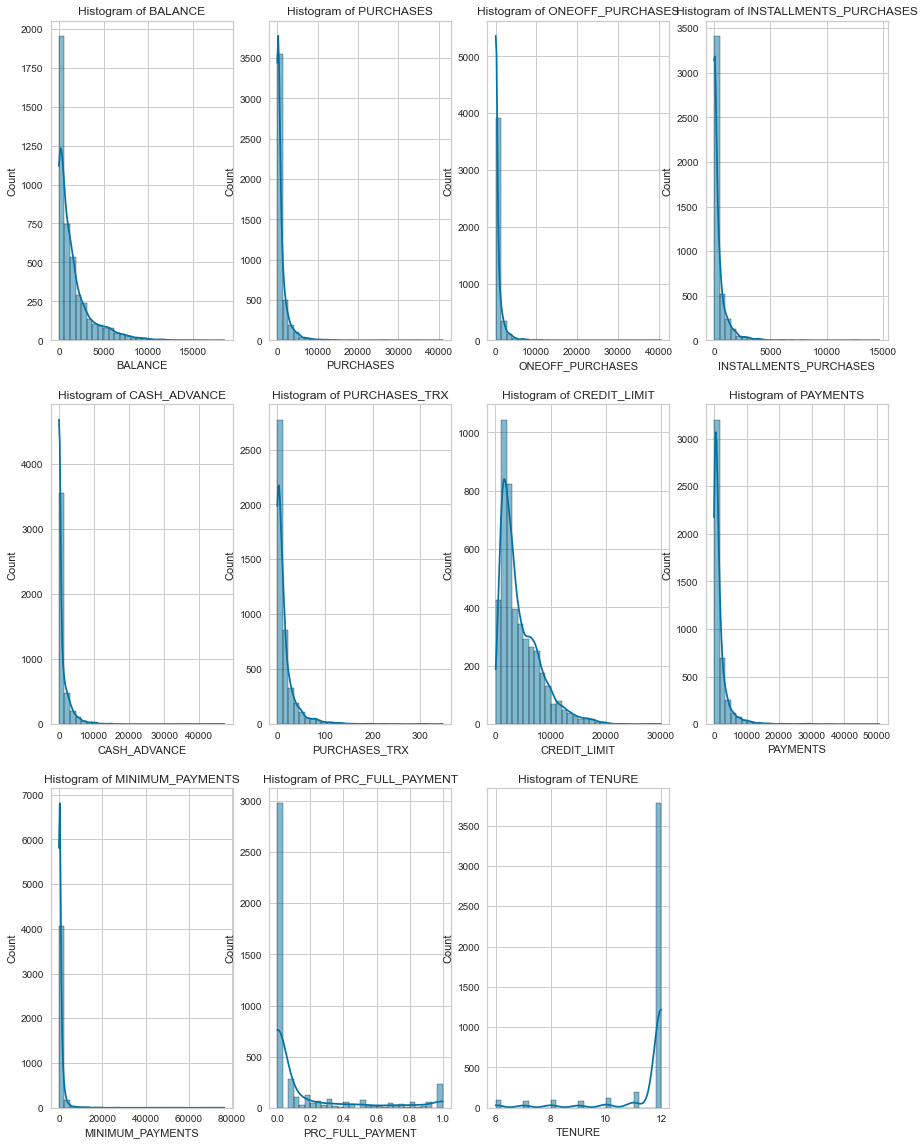

In [10]:
# Membuat grafik histogram

plt.figure(figsize=(15,20))

plt.subplot(3,4,1)
sns.histplot(data['BALANCE'], bins=30, kde=True)
plt.title('Histogram of BALANCE')

plt.subplot(3,4,2)
sns.histplot(data['PURCHASES'], bins=30, kde=True)
plt.title('Histogram of PURCHASES')

plt.subplot(3,4,3)
sns.histplot(data['ONEOFF_PURCHASES'], bins=30, kde=True)
plt.title('Histogram of ONEOFF_PURCHASES')

plt.subplot(3,4,4)
sns.histplot(data['INSTALLMENTS_PURCHASES'], bins=30, kde=True)
plt.title('Histogram of INSTALLMENTS_PURCHASES')

plt.subplot(3,4,5)
sns.histplot(data['CASH_ADVANCE'], bins=30, kde=True)
plt.title('Histogram of CASH_ADVANCE')

plt.subplot(3,4,6)
sns.histplot(data['PURCHASES_TRX'], bins=30, kde=True)
plt.title('Histogram of PURCHASES_TRX')

plt.subplot(3,4,7)
sns.histplot(data['CREDIT_LIMIT'], bins=30, kde=True)
plt.title('Histogram of CREDIT_LIMIT')

plt.subplot(3,4,8)
sns.histplot(data['PAYMENTS'], bins=30, kde=True)
plt.title('Histogram of PAYMENTS')

plt.subplot(3,4,9)
sns.histplot(data['MINIMUM_PAYMENTS'], bins=30, kde=True)
plt.title('Histogram of MINIMUM_PAYMENTS')

plt.subplot(3,4,10)
sns.histplot(data['PRC_FULL_PAYMENT'], bins=30, kde=True)
plt.title('Histogram of PRC_FULL_PAYMENT')

plt.subplot(3,4,11)
sns.histplot(data['TENURE'], bins=30, kde=True)
plt.title('Histogram of TENURE')

plt.show()

Berdasarkan grafik histogram di atas, dapat diketahui bahwa:
- Mayoritas kolom terdistribusi secara right-skewed
- Kolom 'TENURE' terdistribusi secara left-skewed

## V. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model. Data Preprocessing yang dilakukan adalah:
1. Get data for model inference
2. Data Outlier
3. Missing Values
4. Feature Selection
5. Feature Scaling
6. Variance Infloating Factor (VIF)
7. PCA
8. Clustering

### V.1 Get Data For Model Inference

In [11]:
data_inf = data.sample(10, random_state = 6)
data_inf

,CUSTOMER_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4218,8045,7764.210895,1.000000,90.00,90.00,0.00,4032.071583,0.083333,0.083333,0.000000,0.583333,13,1,11150.0,1566.916181,2091.528879,0.000000,12
2217,4723,66.047800,0.454545,674.67,674.67,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,8,600.0,538.053223,167.184850,1.000000,12
584,2963,134.961317,1.000000,1432.66,644.67,787.99,0.000000,1.000000,0.416667,1.000000,0.000000,0,74,2000.0,1276.016501,162.738008,0.666667,12
1114,8773,19.112841,1.000000,504.20,0.00,504.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,1000.0,476.370018,130.862225,0.727273,12
3076,7315,27.498033,1.000000,0.00,0.00,0.00,37.771996,0.000000,0.000000,0.000000,0.083333,1,0,1000.0,46.365579,276.074313,0.100000,12
2841,621,3183.529482,1.000000,386.12,386.12,0.00,3715.643596,0.636364,0.636364,0.000000,0.363636,7,9,4000.0,4441.185925,752.309324,0.000000,11
1718,6663,520.521822,1.000000,820.29,820.29,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,11,6000.0,2295.229351,274.668404,0.000000,12
3459,1839,518.894713,1.000000,0.00,0.00,0.00,2166.099038,0.000000,0.000000,0.000000,0.333333,3,0,1200.0,1361.199423,178.257591,0.500000,6
3966,3227,2833.613641,1.000000,1387.52,526.12,861.40,1442.587409,1.000000,0.250000,0.750000,0.166667,5,20,3000.0,1564.459934,2019.019279,0.000000,12
1522,1549,104.572870,1.000000,937.56,630.00,307.56,0.000000,0.666667,0.083333,0.666667,0.000000,0,13,6000.0,870.874657,179.369855,0.583333,12


In [14]:
# Remove Inference-Set from Dataset

data_train = data.drop(data_inf.index)
data_train

,CUSTOMER_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [15]:
# Reset Index

data_train.reset_index(drop = True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,CUSTOMER_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,8045,7764.210895,1.000000,90.00,90.00,0.00,4032.071583,0.083333,0.083333,0.000000,0.583333,13,1,11150.0,1566.916181,2091.528879,0.000000,12
1,4723,66.047800,0.454545,674.67,674.67,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,8,600.0,538.053223,167.184850,1.000000,12
2,2963,134.961317,1.000000,1432.66,644.67,787.99,0.000000,1.000000,0.416667,1.000000,0.000000,0,74,2000.0,1276.016501,162.738008,0.666667,12
3,8773,19.112841,1.000000,504.20,0.00,504.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,1000.0,476.370018,130.862225,0.727273,12
4,7315,27.498033,1.000000,0.00,0.00,0.00,37.771996,0.000000,0.000000,0.000000,0.083333,1,0,1000.0,46.365579,276.074313,0.100000,12
5,621,3183.529482,1.000000,386.12,386.12,0.00,3715.643596,0.636364,0.636364,0.000000,0.363636,7,9,4000.0,4441.185925,752.309324,0.000000,11
6,6663,520.521822,1.000000,820.29,820.29,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,11,6000.0,2295.229351,274.668404,0.000000,12
7,1839,518.894713,1.000000,0.00,0.00,0.00,2166.099038,0.000000,0.000000,0.000000,0.333333,3,0,1200.0,1361.199423,178.257591,0.500000,6
8,3227,2833.613641,1.000000,1387.52,526.12,861.40,1442.587409,1.000000,0.250000,0.750000,0.166667,5,20,3000.0,1564.459934,2019.019279,0.000000,12
9,1549,104.572870,1.000000,937.56,630.00,307.56,0.000000,0.666667,0.083333,0.666667,0.000000,0,13,6000.0,870.874657,179.369855,0.583333,12


### V.2 Handling Outlier

In [16]:
# Membuat fungsi untuk pembuatan histogram dan boxplot

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

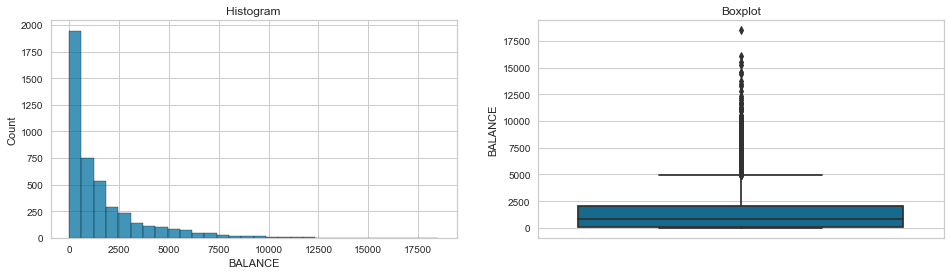


Skewness Value :  2.330778223451966


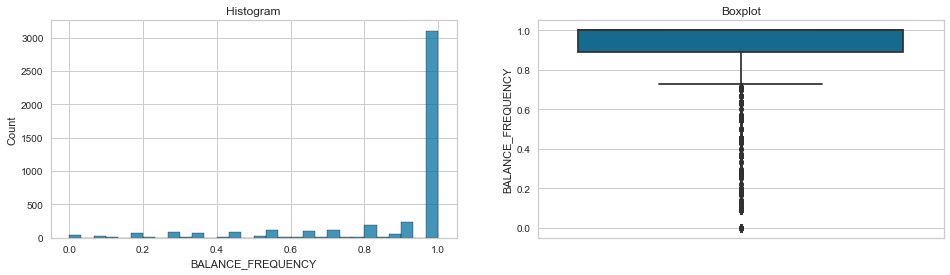


Skewness Value :  -2.0251343840532874


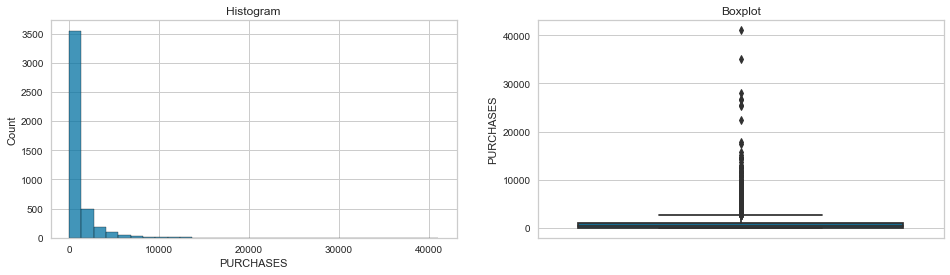


Skewness Value :  7.064853993615921


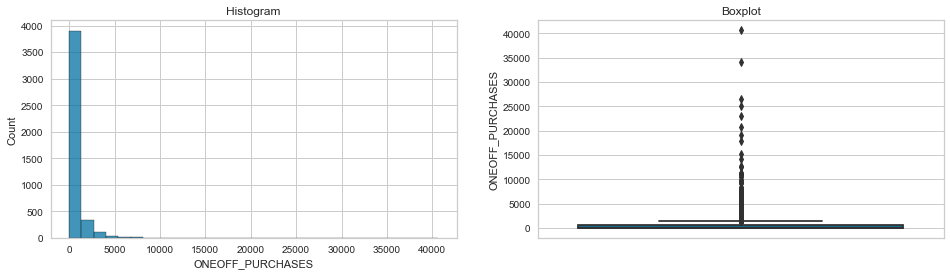


Skewness Value :  9.940834464818469


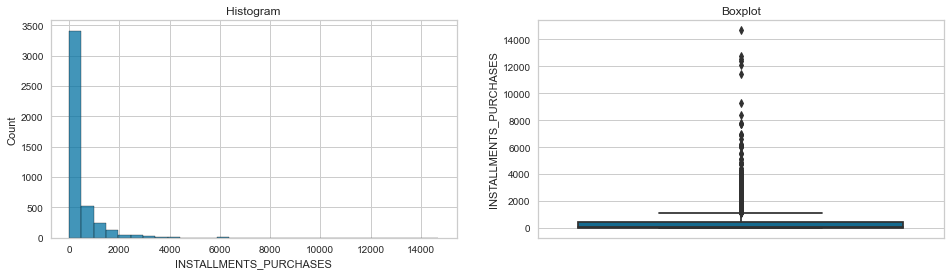


Skewness Value :  6.326147788505364


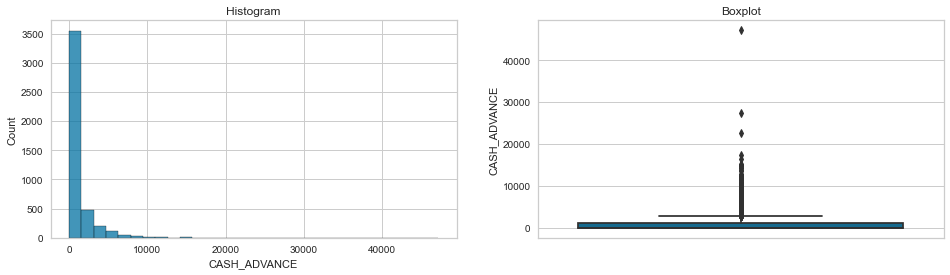


Skewness Value :  5.641903740844329


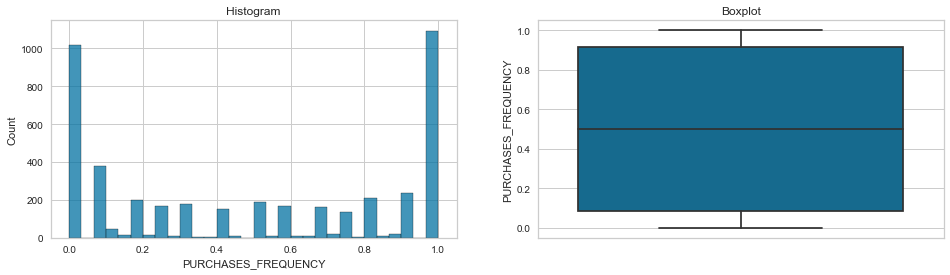


Skewness Value :  0.059638212771977395


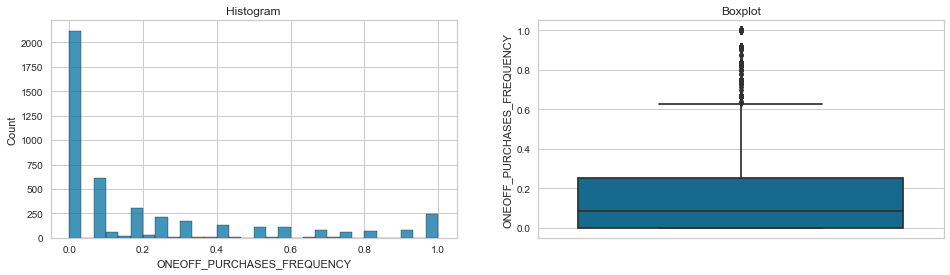


Skewness Value :  1.5501676215183635


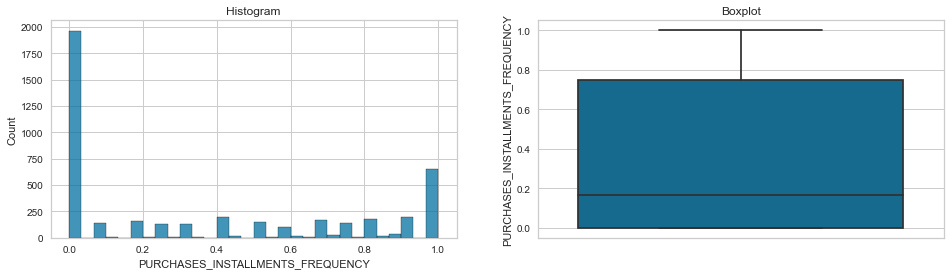


Skewness Value :  0.5082352933794805


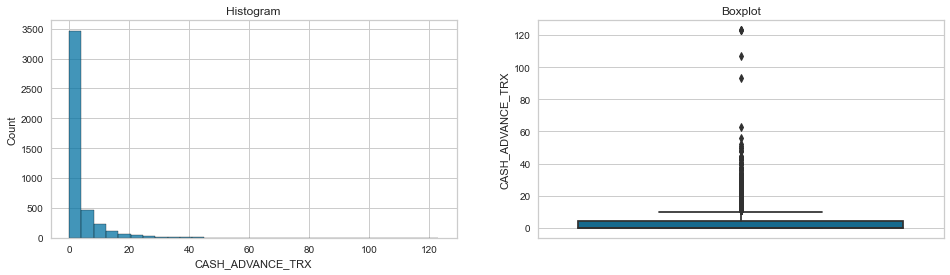


Skewness Value :  6.4192847293613635


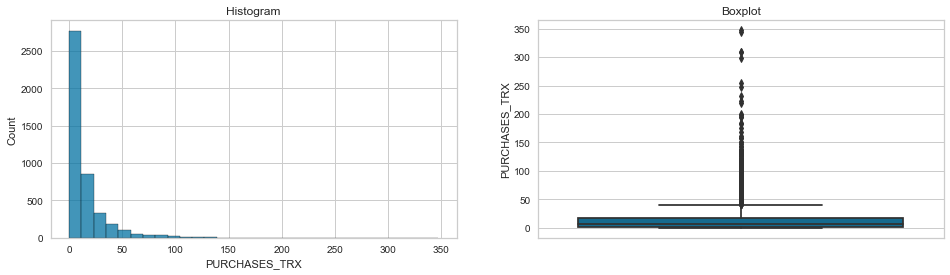


Skewness Value :  4.7501985938096425


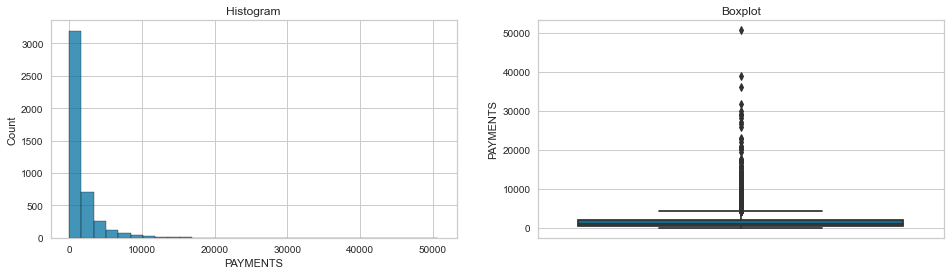


Skewness Value :  5.743813650385125


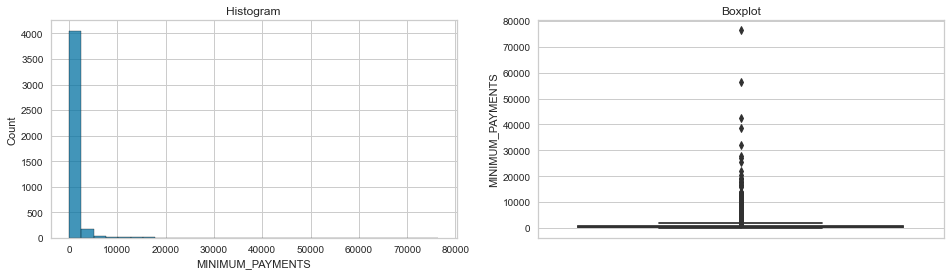


Skewness Value :  14.6572476608793


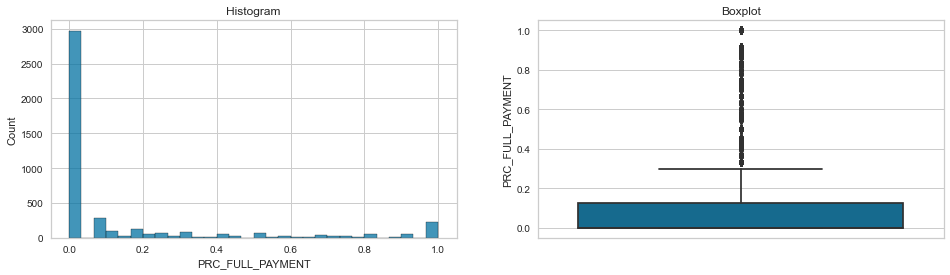


Skewness Value :  1.9817881208485535


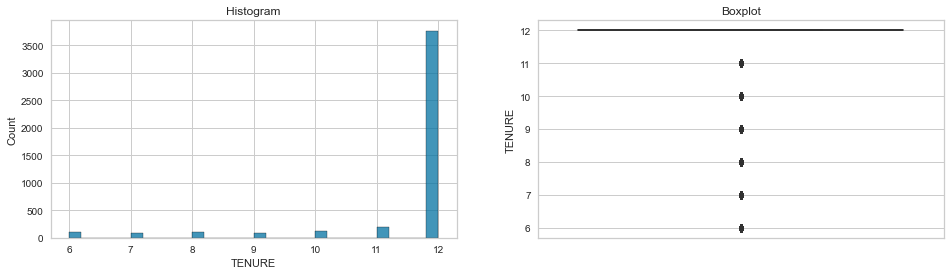


Skewness Value :  -2.954288068654847


In [17]:
# Mengecek apakah terdapat data outlier

diagnostic_plots(data_train, 'BALANCE')
print('\nSkewness Value : ', data_train['BALANCE'].skew())

diagnostic_plots(data_train, 'BALANCE_FREQUENCY')
print('\nSkewness Value : ', data_train['BALANCE_FREQUENCY'].skew())

diagnostic_plots(data_train, 'PURCHASES')
print('\nSkewness Value : ', data_train['PURCHASES'].skew())

diagnostic_plots(data_train, 'ONEOFF_PURCHASES')
print('\nSkewness Value : ', data_train['ONEOFF_PURCHASES'].skew())

diagnostic_plots(data_train, 'INSTALLMENTS_PURCHASES')
print('\nSkewness Value : ', data_train['INSTALLMENTS_PURCHASES'].skew())

diagnostic_plots(data_train, 'CASH_ADVANCE')
print('\nSkewness Value : ', data_train['CASH_ADVANCE'].skew())

diagnostic_plots(data_train, 'PURCHASES_FREQUENCY')
print('\nSkewness Value : ', data_train['PURCHASES_FREQUENCY'].skew())

diagnostic_plots(data_train, 'ONEOFF_PURCHASES_FREQUENCY')
print('\nSkewness Value : ', data_train['ONEOFF_PURCHASES_FREQUENCY'].skew())

diagnostic_plots(data_train, 'PURCHASES_INSTALLMENTS_FREQUENCY')
print('\nSkewness Value : ', data_train['PURCHASES_INSTALLMENTS_FREQUENCY'].skew())

diagnostic_plots(data_train, 'CASH_ADVANCE_TRX')
print('\nSkewness Value : ', data_train['CASH_ADVANCE_TRX'].skew())

diagnostic_plots(data_train, 'PURCHASES_TRX')
print('\nSkewness Value : ', data_train['PURCHASES_TRX'].skew())

diagnostic_plots(data_train, 'PAYMENTS')
print('\nSkewness Value : ', data_train['PAYMENTS'].skew())

diagnostic_plots(data_train, 'MINIMUM_PAYMENTS')
print('\nSkewness Value : ', data_train['MINIMUM_PAYMENTS'].skew())

diagnostic_plots(data_train, 'PRC_FULL_PAYMENT')
print('\nSkewness Value : ', data_train['PRC_FULL_PAYMENT'].skew())

diagnostic_plots(data_train, 'TENURE')
print('\nSkewness Value : ', data_train['TENURE'].skew())

Berdasarkan data di atas, terdapat beberapa data outlier. Tetapi data-data outlier tersebut akan dibiarkan, karena merupakan bagian data natural/alamiah, bukan merupakan kesalahan input data.

### V.3 Handling Missing Value

In [18]:
# Mengecek missing value pada data

data_train.isnull().sum()

CUSTOMER_ID                           0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [19]:
# Menangani missing value pada data_train dengan melakukan imputasi median

median_mp = data_train['MINIMUM_PAYMENTS'].median()
data_train['MINIMUM_PAYMENTS'] = data_train['MINIMUM_PAYMENTS'].fillna(median_mp)

# Mengecek kembali jumlah missing value pada data_train

data_train.isnull().sum()

CUSTOMER_ID                         0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Berdasarkan pengecekan missing value, terdapat 155 missing data pada kolom 'MINIMUM_PAYMENTS'. Untuk menangani missing value tersebut, dilakukan imputasi dengan nilai median pada kolom 'MINIMUM_PAYMENTS'. Setelah dilakukan imputasi, sudah tidak terdapat data missing value pada dataset. 

### V.4 Feature Selection


In [20]:
# Menampilkan data

data_train

,CUSTOMER_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,314.386305,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,314.386305,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,2345,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4461,6785,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4462,7347,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4463,8447,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


Pada bagian ini, feature yang akan dipilih adalah feature kolom numerik. Maka feature yang dipilih adalah:
- 'BALANCE'
- 'BALANCE_FREQUENCY'
- 'PURCHASES'
- 'ONEOFF_PURCHASES'
- 'INSTALLMENTS_PURCHASES'
- 'CASH_ADVANCE'
- 'PURCHASES_FREQUENCY'
- 'ONEOFF_PURCHASES_FREQUENCY'
- 'PURCHASES_INSTALLMENTS_FREQUENCY'
- 'CASH_ADVANCE_FREQUENCY'
- 'CASH_ADVANCE_TRX'
- 'PURCHASES_TRX'
- 'CREDIT_LIMIT'
- 'PAYMENTS'
- 'MINIMUM_PAYMENTS'
- 'PRC_FULL_PAYMENT'
- 'TENURE'

Maka kolom yang tidak dipilih, yaitu 'CUSTOMER_ID' akan dihapus.

In [21]:
# Menghapus kolom-kolom yang tidak digunakan

data_train = data_train.drop(columns=['CUSTOMER_ID'])
data_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,314.386305,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,314.386305,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4461,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4462,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4463,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [22]:
# Mendapatkan kolom numerikan

num_columns = data_train[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].columns.tolist()

print('Numerical Columns di data  : ', num_columns)

Numerical Columns di data  :  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


### V.5 Feature Scaling
Pada bagian ini akan dilakukan scaling untuk kolom numerik. Scaling yang akan digunakan adalah StandardScaler, karena StandardScaler melakukan normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang besar.

In [23]:
# Feature Scaling menggunakan StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

data_scaled=scaler.transform(data_train)
data_scaled

array([[-0.75296734, -3.15457185, -0.46515576, ..., -0.2254327 ,
        -0.51872961, -2.65058613],
       [-0.75481813, -3.67908905, -0.40160742, ..., -0.2254327 ,
        -0.51872961, -2.65058613],
       [-0.38884716, -0.00746867, -0.4106428 , ...,  0.74354824,
        -0.51872961, -2.65058613],
       ...,
       [-0.11611667,  0.51704853, -0.48698034, ..., -0.22607923,
        -0.51872961, -0.3907299 ],
       [-0.24282543,  0.51704853, -0.48698034, ..., -0.240984  ,
        -0.51872961, -0.3907299 ],
       [ 0.90983536,  0.51704853, -0.38755723, ..., -0.01553725,
        -0.51872961, -0.3907299 ]])

In [24]:
# Membuat dataframe baru

data_final = pd.DataFrame(data_scaled, columns=[num_columns])
data_final

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.752967,-3.154572,-0.465156,-0.333452,-0.46224,-0.477360,-0.907029,-0.258685,-0.915599,-0.677011,-0.462532,-0.545161,-1.107310,-0.615124,-0.225433,-0.51873,-2.650586
1,-0.754818,-3.679089,-0.401607,-0.254279,-0.46224,-0.477360,-0.907029,-0.258685,-0.915599,-0.677011,-0.462532,-0.545161,0.693467,-0.615124,-0.225433,-0.51873,-2.650586
2,-0.388847,-0.007469,-0.410643,-0.265536,-0.46224,-0.477360,-0.907029,-0.258685,-0.915599,-0.677011,-0.462532,-0.349450,-0.913380,-0.087020,0.743548,-0.51873,-2.650586
3,-0.627076,-2.105537,0.070759,0.334224,-0.46224,-0.477360,-0.907029,-0.258685,-0.915599,-0.677011,-0.462532,-0.545161,-0.913380,0.455366,-0.320887,-0.51873,-2.650586
4,-0.542075,0.517049,-0.195986,0.001897,-0.46224,-0.477360,-0.907029,-0.258685,-0.915599,-0.677011,-0.462532,-0.545161,-0.968788,-0.539038,-0.299034,-0.51873,-2.650586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,3.894779,0.517049,-0.486980,-0.360642,-0.46224,1.643910,-1.217318,-0.677938,-0.915599,2.036390,0.798106,-0.584304,2.078679,0.257341,0.533301,-0.51873,-0.390730
4461,-0.252656,0.517049,-0.486980,-0.360642,-0.46224,0.197314,-1.217318,-0.677938,-0.915599,2.036390,2.058745,-0.584304,-0.857971,-0.512601,-0.236436,-0.51873,-0.390730
4462,-0.116117,0.517049,-0.486980,-0.360642,-0.46224,-0.107529,-1.217318,-0.677938,-0.915599,2.036390,1.078248,-0.584304,-0.830267,-0.249165,-0.226079,-0.51873,-0.390730
4463,-0.242825,0.517049,-0.486980,-0.360642,-0.46224,0.238654,-1.217318,-0.677938,-0.915599,2.036390,0.938177,-0.584304,-0.691746,-0.471175,-0.240984,-0.51873,-0.390730


### V.6 Variance Infloating Factor (VIF)

In [25]:
# Menghitung nilai VIF pada setiap feature

vif_data = pd.DataFrame()
vif_data["Feature"] = data_train.columns
vif_data["VIF"] = [variance_inflation_factor(data_final.values, i) for i in range(len(data_train.columns))]

vif_data

,Feature,VIF
0,BALANCE,2.686442
1,BALANCE_FREQUENCY,1.303635
2,PURCHASES,43913.091875
3,ONEOFF_PURCHASES,28302.338976
4,INSTALLMENTS_PURCHASES,8006.399667
5,CASH_ADVANCE,2.909334
6,PURCHASES_FREQUENCY,10.900922
7,ONEOFF_PURCHASES_FREQUENCY,3.905858
8,PURCHASES_INSTALLMENTS_FREQUENCY,9.435571
9,CASH_ADVANCE_FREQUENCY,3.411756


<p align='justify'>Berdasarkan data perhitungan VIF, terdapat 5 feature yang memiliki nilai di atas 5, yaitu 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASE', 'PURCHASES_FREQUENCY', dan 'PURCHASES_INSTALLMENTS_FREQUENCY'. Sedangkan 12 feature lainnya memiliki nilai di bawah 5, yang berarti feature-feature tersebut tidak saling berkaitan dengan feature lainnya.</p>

### V.7 Principal Component Analysis (PCA)

In [26]:
# Melakukan PCA dengan jumlah komponen awal

pca_scaled=PCA(n_components=17).fit(data_scaled)
pca_scaled.explained_variance_ratio_

array([2.70906256e-01, 2.04440330e-01, 8.92415788e-02, 7.42991975e-02,
       6.32169844e-02, 5.70480131e-02, 4.81397434e-02, 4.31095930e-02,
       3.78586531e-02, 3.05915906e-02, 2.37268575e-02, 1.80683758e-02,
       1.38406951e-02, 1.22823193e-02, 1.05547392e-02, 2.67433963e-03,
       7.33291642e-07])

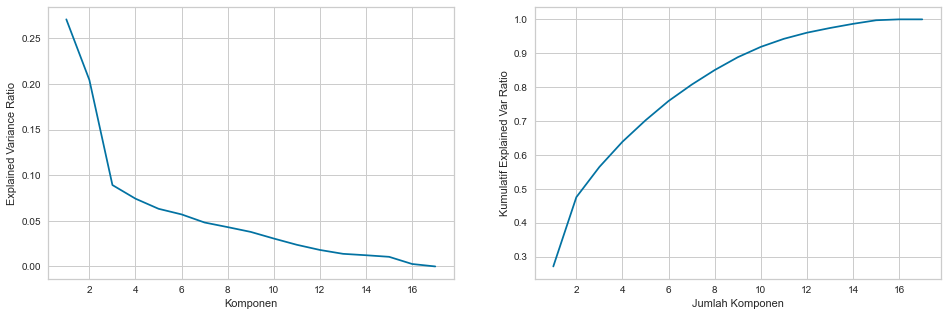

In [27]:
## Membuat Grafik EVR berdasarkan PCA komponen awal

fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,18),pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,18),np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

Berdasarkan grafik EVR, dapat dilihat bahwa terdapat degradasi nilai EVR yang gradual dari komponen pertama hingga terakhir. Jika dilakukan reduksi dimensi sampai 8 dimensi, kemungkinan 8 komponen merupakan jumlah terbaik dengan cumsum EVR sekitar 80% hingga 90%.

In [63]:
# Melakukan PCA dengan jumlah komponen baru

pca_scaled=PCA(n_components=8).fit(data_scaled)
pca_scaled.explained_variance_ratio_
pca_value= pca_scaled.transform(data_scaled) 
print(pca_value)

[[-2.40323127 -1.38691167  1.67553315 ...  1.95440306  0.34280544
  -0.94146414]
 [-2.03372541 -1.03027811  2.169168   ...  1.28972715  1.33129617
  -1.73818942]
 [-1.58732936 -0.52168083  0.52247893 ...  2.53326683  0.67283296
   0.32331925]
 ...
 [-2.03085512  1.56045432 -0.11190075 ...  0.71697998 -0.96946396
   0.48144651]
 [-2.07742733  1.5805556  -0.14068668 ...  0.65317067 -0.85283466
   0.39854461]
 [-1.1495611   3.08512318  0.02579223 ... -0.1578758   0.99869945
  -0.65378327]]


### V.8 Clustering

#### KMeans

In [64]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=6).fit(pca_value)
                for k in range(1, 9)]

Elbow Method


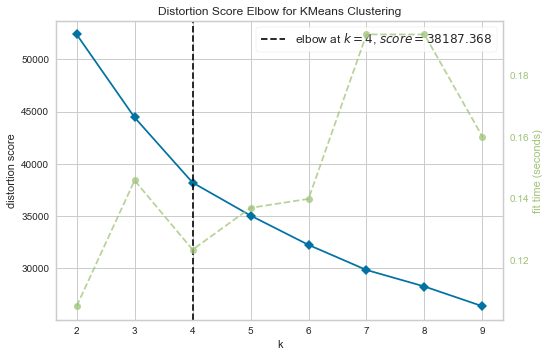

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(pca_value)
Elbow_M.show()

Berdasarkan elbow method, nilai k yang optimal untuk model KMeans adalah 4, dengan nilai 38187.368

In [66]:
k=[2,3,4,5,6,7,8,9]
kmeans_per_k = [KMeans(n_clusters=k, random_state=6).fit(pca_value)
                for k in range(1, 9)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [67]:
silhouette_scores = [silhouette_score(pca_value, model.labels_)
                     for model in kmeans_per_k[1:]]

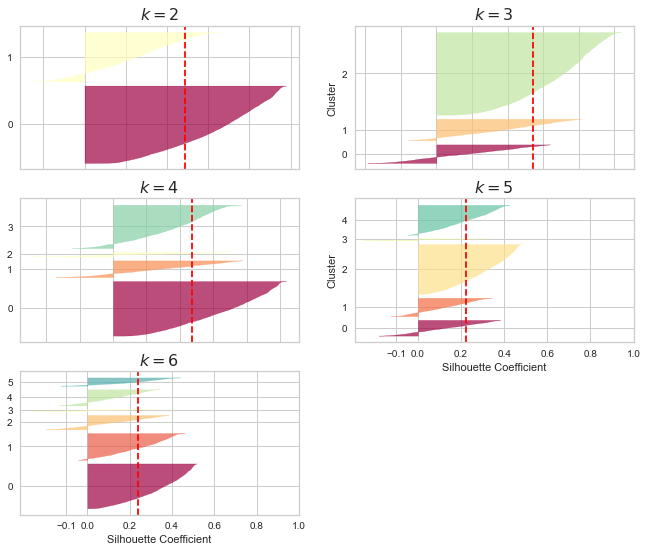

In [68]:
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(pca_value, y_pred)

    padding = len(pca_value) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Berdasarkan silhouette method, nilai k yang optimal untuk model KMeans adalah 3. Pada k=3, semua cluster, terutama cluster 0 dan 1, berukuran kira-kira sama dan semua cluster tersebut melewati garis putus-putus yang mewakiliki rata-rata silhouette score. Sedangkan jika k=4, ukuran cluster 2 terlihat lebih kecil dibandingkan cluster lainnya.

#### Agglomerative Clustering

Elbow Method


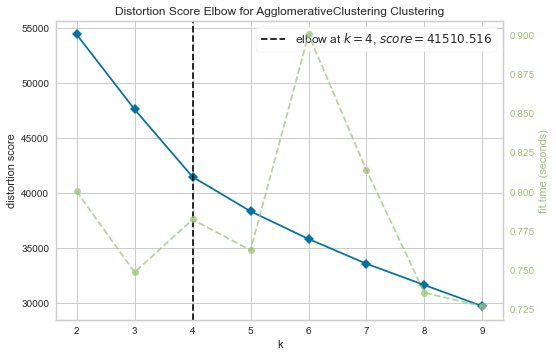

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
print('Elbow Method')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=9)
Elbow_M.fit(pca_value)
Elbow_M.show()

Berdasarkan elbow method, nilai k yang optimal untuk model Agglomerative Clustering adalah 4, dengan nilai 41510.516

## VI. Model Definition

### KMeans

In [70]:
# Definisi model yang digunakan

kmeans = KMeans(n_clusters=4, random_state=6)

### Agglomerative Clustering

In [71]:
# Definisi model yang digunakan

agglo = AgglomerativeClustering(n_clusters=4)

### DBSCAN

In [72]:
# Definisi model yang digunakan

dbsc = DBSCAN(eps=1.5, min_samples=7)

## VII. Model Training

### KMeans

In [73]:
# Melakukan model training

kmeans.fit(pca_value)

KMeans(n_clusters=4, random_state=6)

### Agglomerative Clustering

In [74]:
# Melakukan model training

agglo.fit(pca_value)

AgglomerativeClustering(n_clusters=4)

### DBSCAN

In [75]:
# Melakukan model training

dbsc.fit(pca_value)

DBSCAN(eps=1.5, min_samples=7)

## VIII. Model Evaluation

### KMeans

In [76]:
X_cluster1 = data_train.copy()
X_cluster1['cluster'] = kmeans.labels_
X_cluster1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,314.386305,0.0,8,0
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,314.386305,0.0,8,0
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,0
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,1
4461,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,1
4462,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,0
4463,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,0


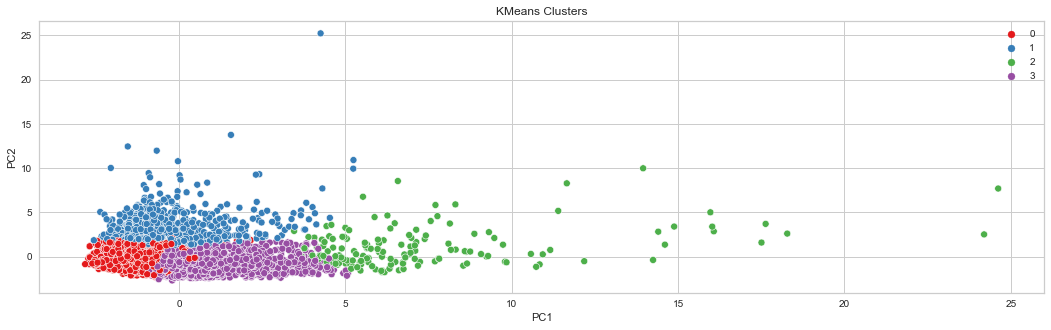

In [77]:
# Visualisasi data

pca_2d = PCA(n_components=2, random_state=6)
X_2d  = pca_2d.fit_transform(pca_value)
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

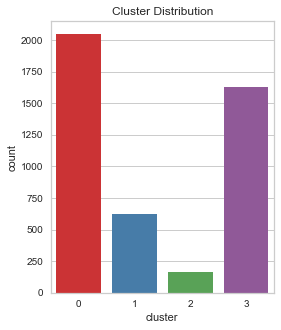

In [78]:
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster1, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

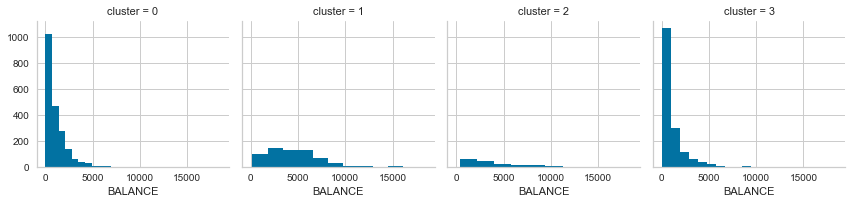

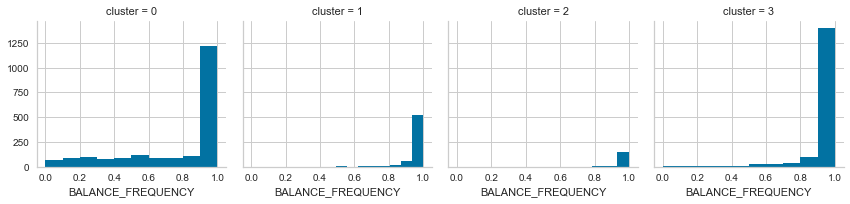

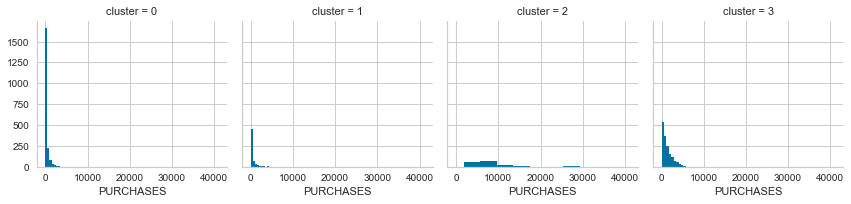

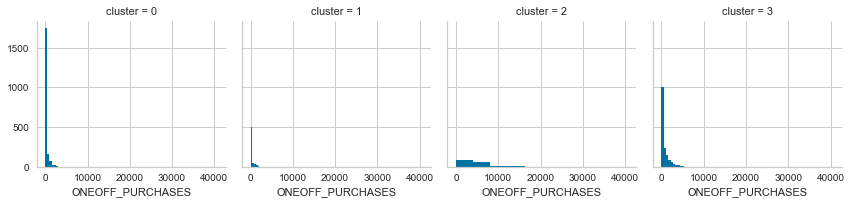

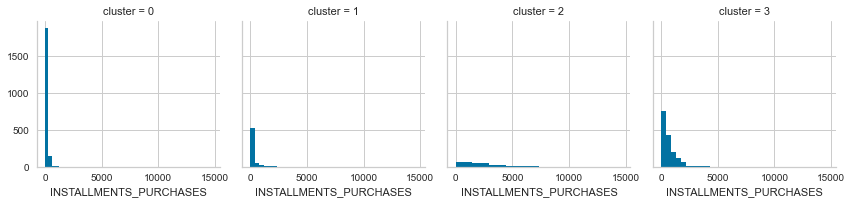

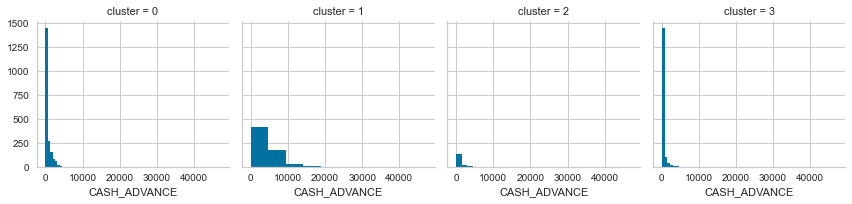

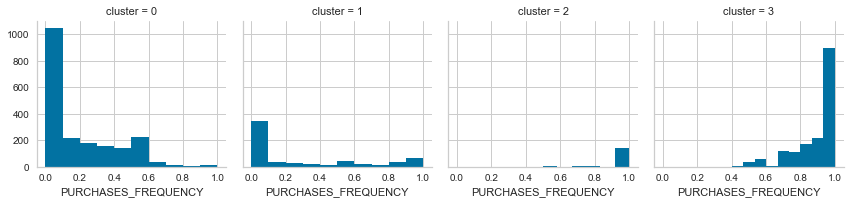

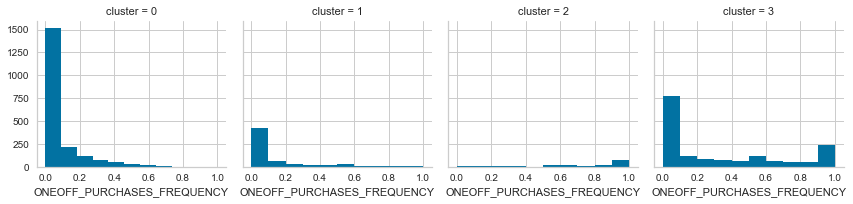

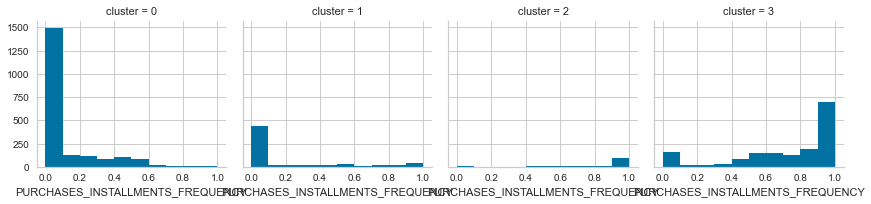

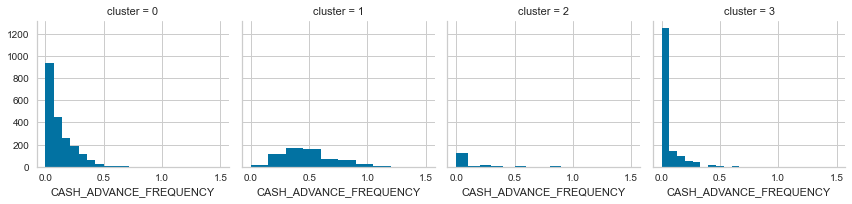

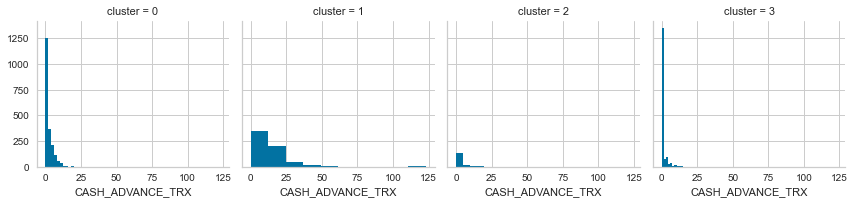

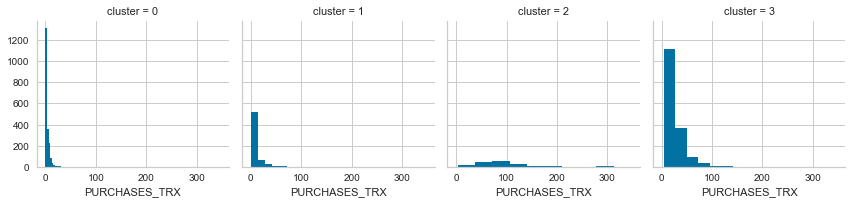

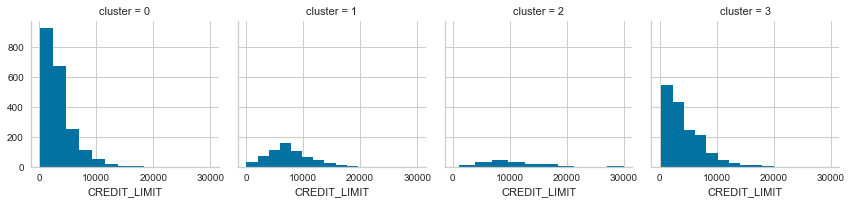

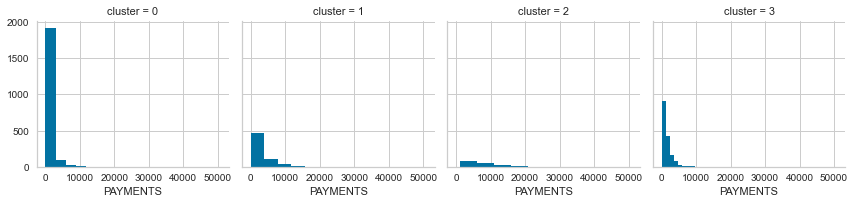

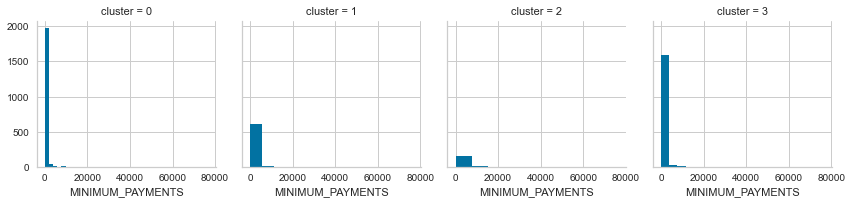

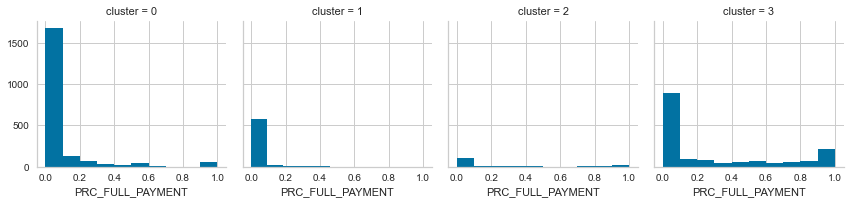

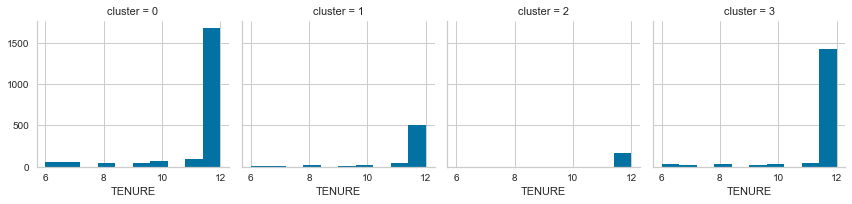

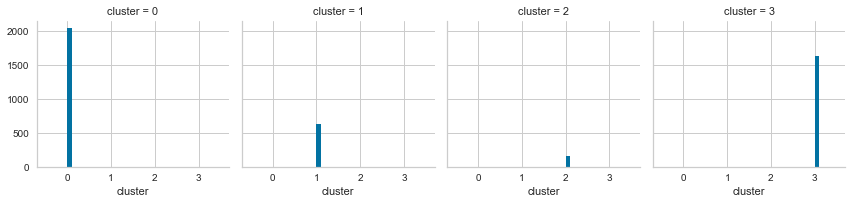

In [79]:
for c in X_cluster1:
    grid= sns.FacetGrid(X_cluster1, col='cluster')
    grid.map(plt.hist, c)

Berdasarkan grafik histogram di atas, dapat diketahui kategori untuk masing-masing cluster adalah:
- Cluster 0

    Memiliki nilai balance yang rendah, sekitar 0-5000, serta nilai purchases, oneoff_purchases, installments_purchases, cash_advance, cash_advance_trx, purchases_trx, credit_limit, payment, minimum_payments, dan prc_full_payment yang rendah. Selain itu cluster 0 memilki data balance frequency sering diupdate, tetapi jarang untuk purchases_frequency, oneoff_purchases_frequency, purchases_installments_frequency, dan cash_advance_frequency.

- Cluster 1

    Memiliki nilai balance yang cukup rendah, sekitar 0-10000, serta nilai purchases, oneoff_purchases, installments_purchases, cash_advance, cash_advance_trx, purchases_trx, credit_limit, payment, minimum_payments, dan prc_full_payment yang rendah. Selain itu cluster 1 memilki data balance frequency sering diupdate, cukup sering purchases_frequency dan cash_advance_frequency serta hampir tidak pernah melakukan oneoff_purchases_frequency, purchases_installments_frequency.
    
- Cluster 2

    Memiliki nilai balance yang rendah, sekitar 0-5000, serta nilai purchases, oneoff_purchases, installments_purchases, cash_advance, cash_advance_trx, purchases_trx, credit_limit, payment, minimum_payments yang cukup rendah dan memiliki nilai yang cukup tinggi untuk prc_full_payment. Selain itu cluster 2 memilki data balance frequency sering diupdate, serta sering purchases_frequency, cukup sering melakukan purchases_installments_frequency, serta hampir tidak pernah oneoff_purchases_frequency dan cash_advance_frequency.

- Cluster 3

    Memiliki nilai balance yang cukup rendah, sekitar 0-10000, serta nilai purchases, oneoff_purchases, installments_purchases, cash_advance, cash_advance_trx, purchases_trx, credit_limit, payment, minimum_payments, dan prc_full_payment yang rendah. Selain itu cluster 3 memilki data balance frequency sering diupdate, cukup sering purchases_frequency, oneoff_purchases_frequency dan purchases_installments_frequency, serta hampir tidak pernah melakukan cash_advance_frequency.

### Agglomerative Clustering

In [80]:
X_cluster2 = data_train.copy()
X_cluster2['cluster'] = agglo.labels_
X_cluster2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,314.386305,0.0,8,0
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,314.386305,0.0,8,0
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,0
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,2
4461,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,0
4462,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,0
4463,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,0


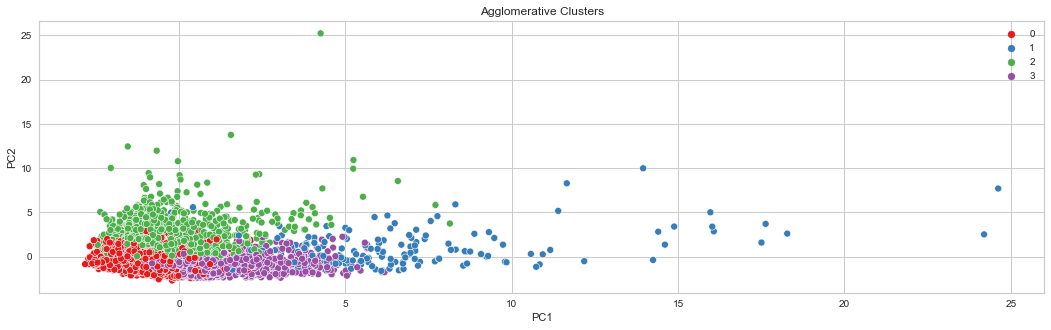

In [81]:
# Visualisasi data

pca_2d = PCA(n_components=2, random_state=6)
X_2d  = pca_2d.fit_transform(pca_value)
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=agglo.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clusters')
plt.show()

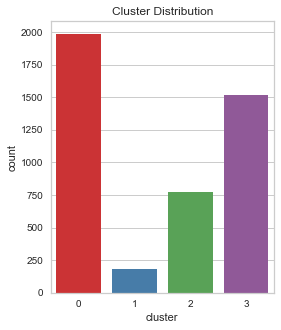

In [82]:
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster2, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

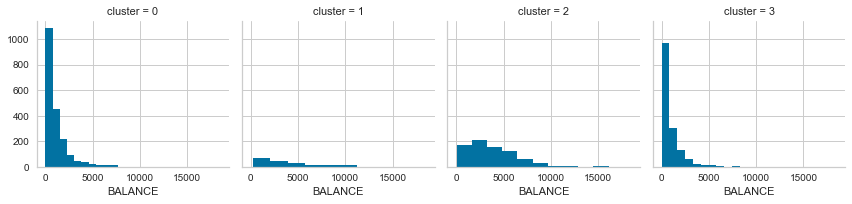

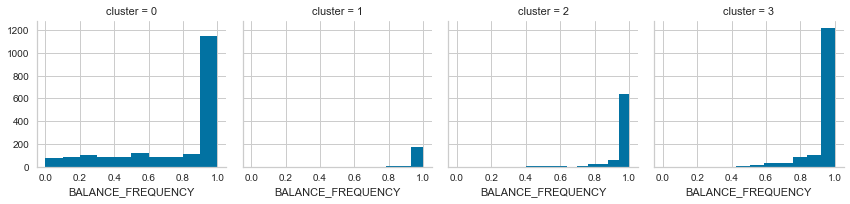

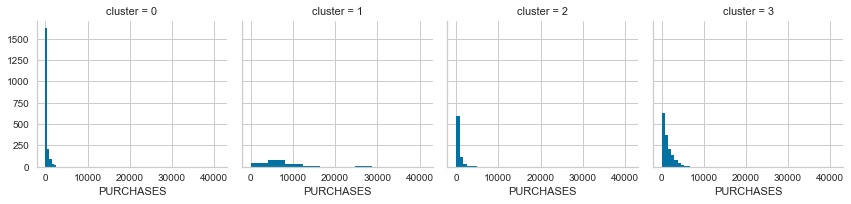

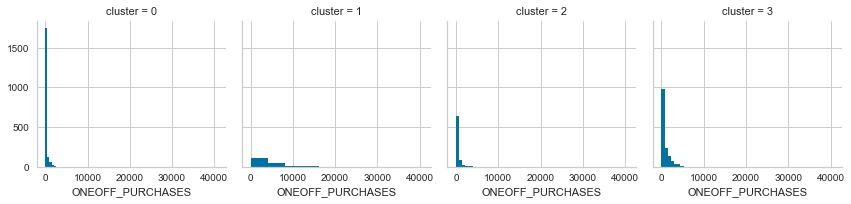

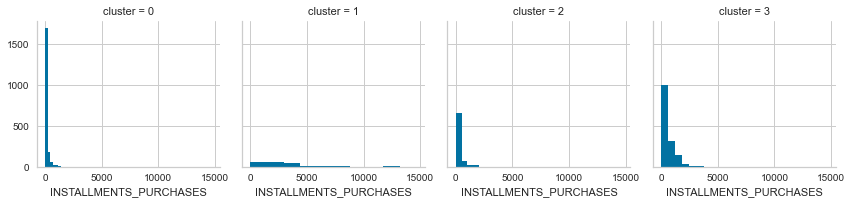

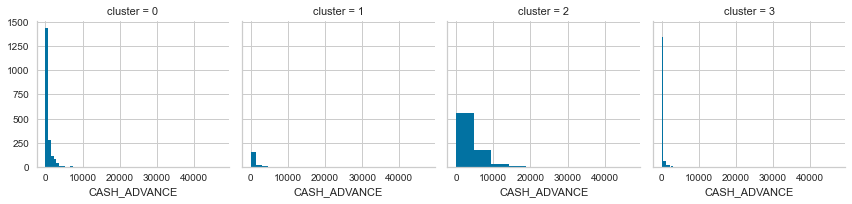

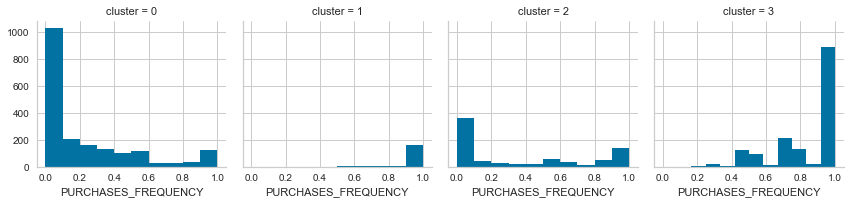

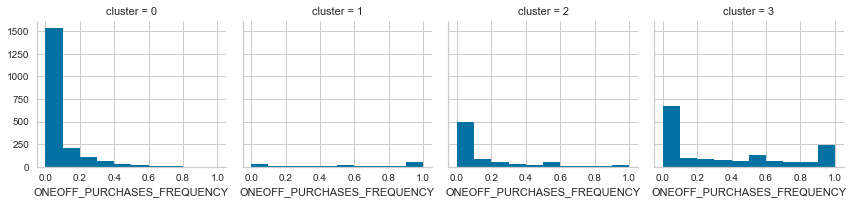

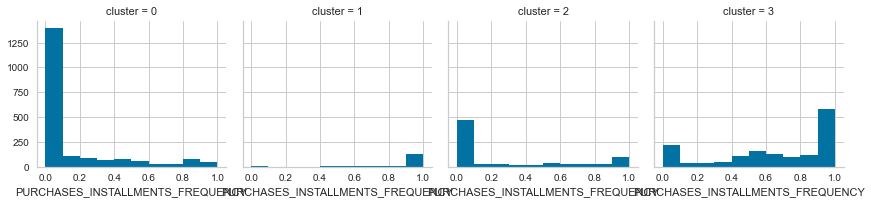

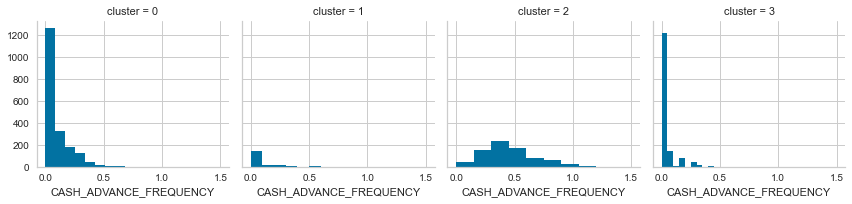

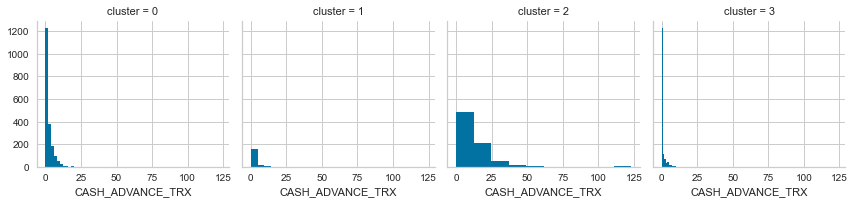

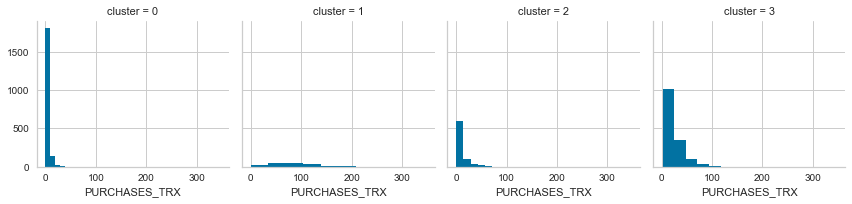

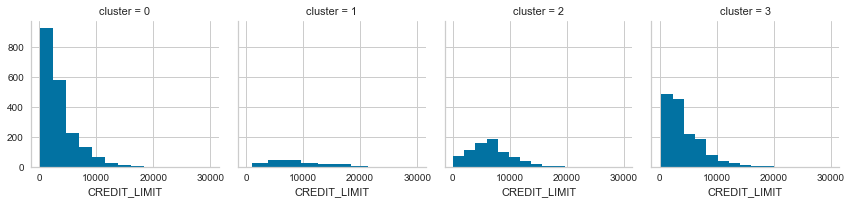

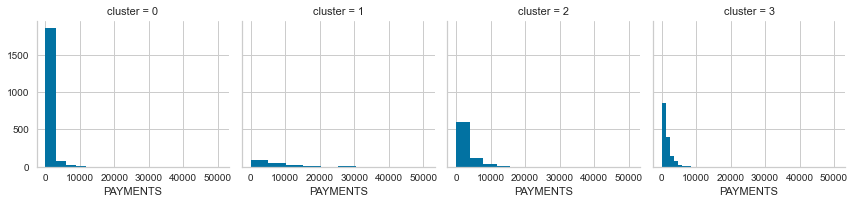

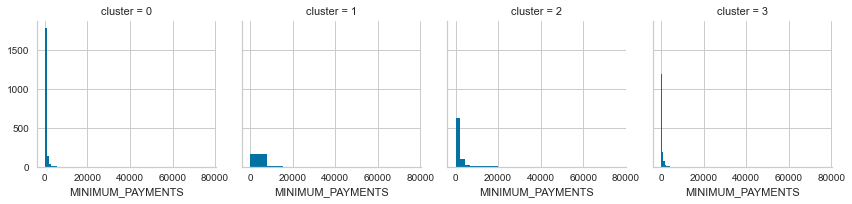

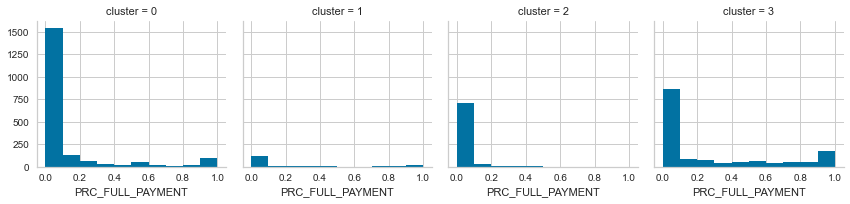

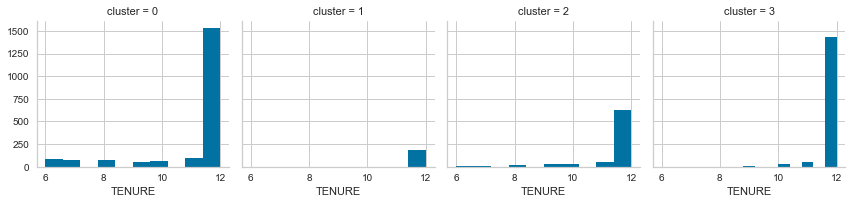

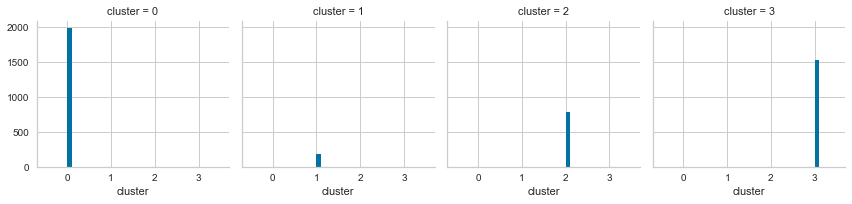

In [83]:
for c in X_cluster2:
    grid= sns.FacetGrid(X_cluster2, col='cluster')
    grid.map(plt.hist, c)

Berdasarkan grafik histogram di atas, dapat diketahui kategori untuk masing-masing cluster adalah:
- Cluster 0

    Memiliki nilai balance yang rendah, sekitar 0-5000, serta nilai purchases, oneoff_purchases, installments_purchases, cash_advance, cash_advance_trx, purchases_trx, credit_limit, payment, minimum_payments, dan prc_full_payment yang rendah. Selain itu cluster 0 memilki data balance frequency sering diupdate, tetapi jarang untuk purchases_frequency, oneoff_purchases_frequency, purchases_installments_frequency, dan cash_advance_frequency.

- Cluster 1

    Memiliki nilai balance yang cukup rendah, sekitar 0-10000, serta nilai purchases, oneoff_purchases, installments_purchases, cash_advance, cash_advance_trx, purchases_trx, credit_limit, payment, minimum_payments, dan prc_full_payment yang rendah. Selain itu cluster 1 memilki data balance frequency sering diupdate, cukup sering purchases_frequency, oneoff_purchases_frequency dan purchases_installments_frequency, serta hampir tidak pernah melakukan cash_advance_frequency.
    
- Cluster 2

    Memiliki nilai balance yang rendah, sekitar 0-5000, serta nilai purchases, oneoff_purchases, installments_purchases, cash_advance, cash_advance_trx, purchases_trx, credit_limit, payment, minimum_payments yang cukup rendah dan memiliki nilai yang cukup tinggi untuk prc_full_payment. Selain itu cluster 2 memilki data balance frequency sering diupdate, serta sering purchases_frequency, cukup sering melakukan purchases_installments_frequency, serta hampir tidak pernah oneoff_purchases_frequency dan cash_advance_frequency.

- Cluster 3

    Memiliki nilai balance yang cukup rendah, sekitar 0-10000, serta nilai purchases, oneoff_purchases, installments_purchases, cash_advance, cash_advance_trx, purchases_trx, credit_limit, payment, minimum_payments, dan prc_full_payment yang rendah. Selain itu cluster 3 memilki data balance frequency sering diupdate, cukup sering purchases_frequency dan cash_advance_frequency serta hampir tidak pernah melakukan oneoff_purchases_frequency, purchases_installments_frequency.


### DBSCAN

In [84]:
X_cluster3 = data_train.copy()
X_cluster3['cluster'] = dbsc.labels_
X_cluster3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,314.386305,0.0,8,0
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,314.386305,0.0,8,0
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,0
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,0
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4460,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,0
4461,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,0
4462,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,0
4463,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,0


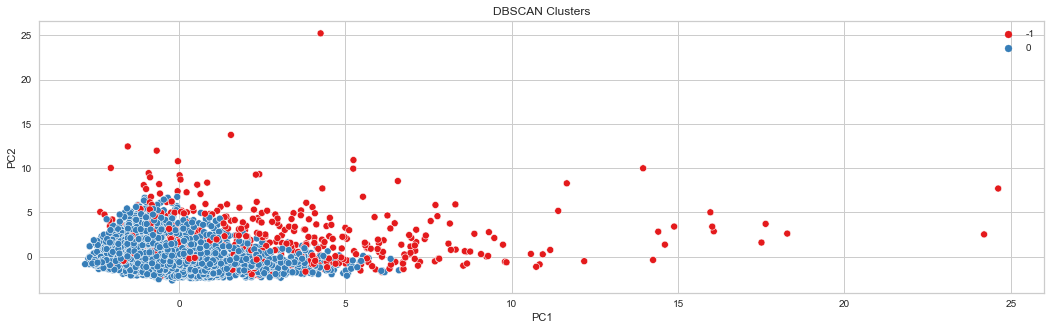

In [85]:
# Visualisasi data

pca_2d = PCA(n_components=2, random_state=6)
X_2d  = pca_2d.fit_transform(pca_value)
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=dbsc.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clusters')
plt.show()

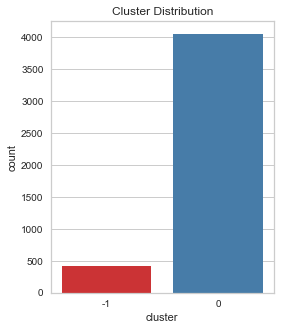

In [86]:
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster3, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

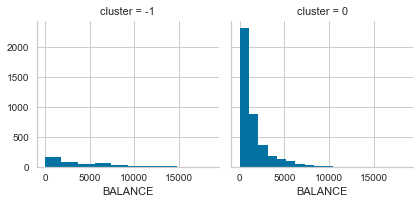

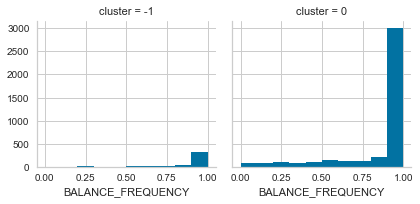

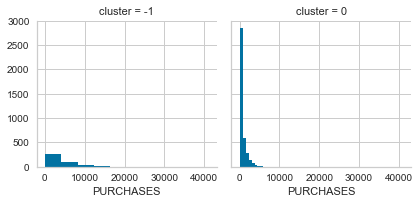

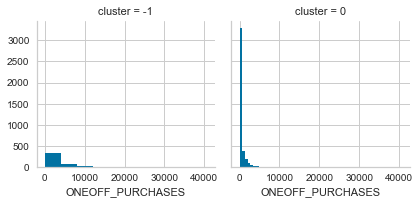

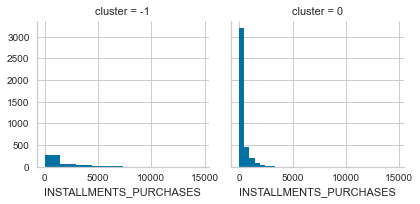

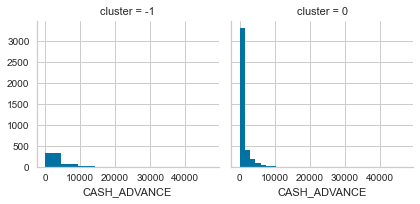

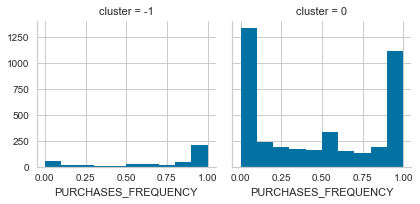

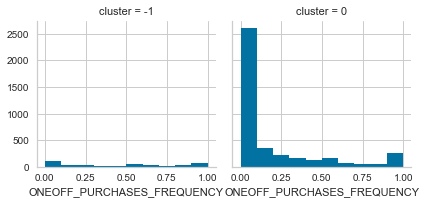

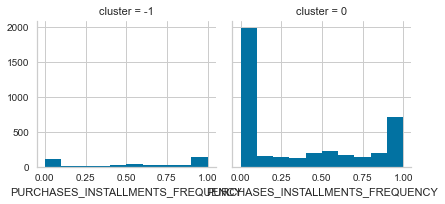

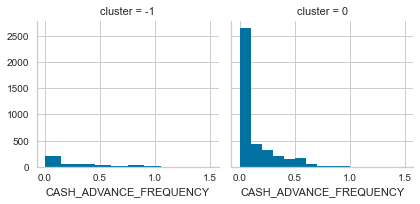

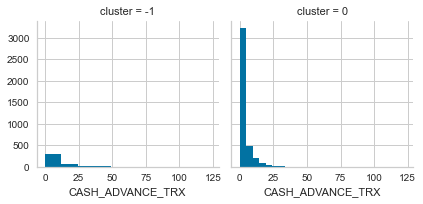

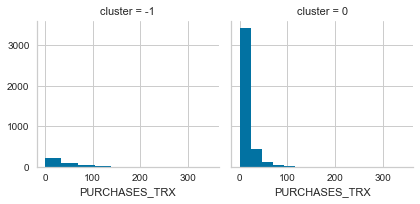

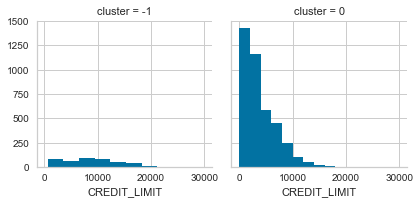

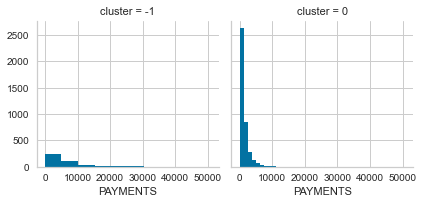

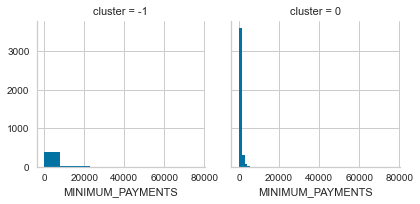

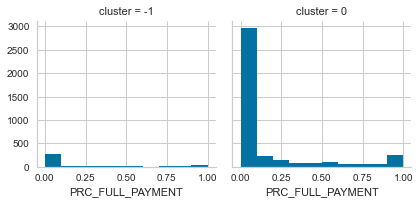

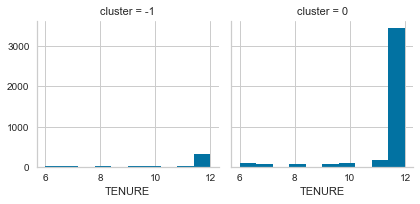

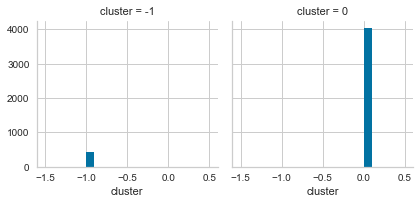

In [87]:
for c in X_cluster3:
    grid= sns.FacetGrid(X_cluster3, col='cluster')
    grid.map(plt.hist, c)

Berdasarkan grafik histogram di atas, dapat diketahui kategori untuk masing-masing cluster adalah:
- Cluster -1

    Memiliki nilai balance yang cukup rendah, sekitar 0-15000, serta nilai purchases, oneoff_purchases, installments_purchases, cash_advance, cash_advance_trx, purchases_trx, credit_limit, payment, minimum_payments, dan prc_full_payment yang rendah. Selain itu cluster -1 memilki data balance frequency sering diupdate, cukup sering purchases_frequency, tetapi tidak sering melakukan oneoff_purchases_frequency, purchases_installments_frequency, dan cash_advance_frequency.

- Cluster 0

    Memiliki nilai balance yang rendah, sekitar 0-5000, serta nilai purchases, oneoff_purchases, installments_purchases, cash_advance, cash_advance_trx, purchases_trx, credit_limit, payment, minimum_payments, dan prc_full_payment yang rendah. Selain itu cluster 0 memilki data balance frequency yang sangat sering diupdate, cukup sering untuk purchases_frequency, purchases_installments_frequency, tetapi jarang untk oneoff_purchases_frequency dan cash_advance_frequency.

Berdasarkan visualisasi data 2 dimensi, model terbaik dari ketiga model tersebut adalah  KMeans. Model KMeans memiliki persebaran cluster yang tidak saling tumpah tindih, sedangkan untuk model Agglomerative Clustering dan DBSCAN, dapat dilihat memiliki persebarang cluster yang saling tumpah tindih. Maka model KMeans akan digunakan untuk model inference.

In [88]:
# Save file untuk data inference

with open('kmeans.pkl', 'wb') as file_1:
    joblib.dump(kmeans, file_1)
   
with open('model_scaler.pkl', 'wb') as file_2:
    joblib.dump(scaler, file_2)

with open('list_num_cols.txt', 'w') as file_3:
    json.dump(num_columns, file_3)

## IX. Model Inference

In [89]:
# Mengakses file yang telah di-save untuk data inference

with open('kmeans.pkl', 'rb') as file_1:
    kmeans = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
    model_scaler = joblib.load(file_2)
    
with open('list_num_cols.txt', 'r') as file_3:
    list_num_cols = json.load(file_3)

In [90]:
# Menampilkan data inference-set

data_inf

,CUSTOMER_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,8045,7764.210895,1.000000,90.00,90.00,0.00,4032.071583,0.083333,0.083333,0.000000,0.583333,13,1,11150.0,1566.916181,2091.528879,0.000000,12
1,4723,66.047800,0.454545,674.67,674.67,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,8,600.0,538.053223,167.184850,1.000000,12
2,2963,134.961317,1.000000,1432.66,644.67,787.99,0.000000,1.000000,0.416667,1.000000,0.000000,0,74,2000.0,1276.016501,162.738008,0.666667,12
3,8773,19.112841,1.000000,504.20,0.00,504.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,1000.0,476.370018,130.862225,0.727273,12
4,7315,27.498033,1.000000,0.00,0.00,0.00,37.771996,0.000000,0.000000,0.000000,0.083333,1,0,1000.0,46.365579,276.074313,0.100000,12
5,621,3183.529482,1.000000,386.12,386.12,0.00,3715.643596,0.636364,0.636364,0.000000,0.363636,7,9,4000.0,4441.185925,752.309324,0.000000,11
6,6663,520.521822,1.000000,820.29,820.29,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,11,6000.0,2295.229351,274.668404,0.000000,12
7,1839,518.894713,1.000000,0.00,0.00,0.00,2166.099038,0.000000,0.000000,0.000000,0.333333,3,0,1200.0,1361.199423,178.257591,0.500000,6
8,3227,2833.613641,1.000000,1387.52,526.12,861.40,1442.587409,1.000000,0.250000,0.750000,0.166667,5,20,3000.0,1564.459934,2019.019279,0.000000,12
9,1549,104.572870,1.000000,937.56,630.00,307.56,0.000000,0.666667,0.083333,0.666667,0.000000,0,13,6000.0,870.874657,179.369855,0.583333,12


In [91]:
# Memisahkan antara Kolom Numerikal

data_inf_num = data_inf[list_num_cols]

# Data data_inf_num

data_inf_num

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,7764.210895,1.000000,90.00,90.00,0.00,4032.071583,0.083333,0.083333,0.000000,0.583333,13,1,11150.0,1566.916181,2091.528879,0.000000,12
1,66.047800,0.454545,674.67,674.67,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,8,600.0,538.053223,167.184850,1.000000,12
2,134.961317,1.000000,1432.66,644.67,787.99,0.000000,1.000000,0.416667,1.000000,0.000000,0,74,2000.0,1276.016501,162.738008,0.666667,12
3,19.112841,1.000000,504.20,0.00,504.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,1000.0,476.370018,130.862225,0.727273,12
4,27.498033,1.000000,0.00,0.00,0.00,37.771996,0.000000,0.000000,0.000000,0.083333,1,0,1000.0,46.365579,276.074313,0.100000,12
5,3183.529482,1.000000,386.12,386.12,0.00,3715.643596,0.636364,0.636364,0.000000,0.363636,7,9,4000.0,4441.185925,752.309324,0.000000,11
6,520.521822,1.000000,820.29,820.29,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,11,6000.0,2295.229351,274.668404,0.000000,12
7,518.894713,1.000000,0.00,0.00,0.00,2166.099038,0.000000,0.000000,0.000000,0.333333,3,0,1200.0,1361.199423,178.257591,0.500000,6
8,2833.613641,1.000000,1387.52,526.12,861.40,1442.587409,1.000000,0.250000,0.750000,0.166667,5,20,3000.0,1564.459934,2019.019279,0.000000,12
9,104.572870,1.000000,937.56,630.00,307.56,0.000000,0.666667,0.083333,0.666667,0.000000,0,13,6000.0,870.874657,179.369855,0.583333,12


In [92]:
# Feature Scaling dan Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)

# Menampilkan data yang telah di-scaling

data_inf_num_scaled

array([[ 2.99400496,  0.51704853, -0.44333117, -0.3062613 , -0.46223998,
         1.47880284, -1.01045987, -0.39843718, -0.91559851,  2.22481672,
         1.3583901 , -0.54516134,  1.84319312, -0.06142374,  0.51547098,
        -0.51872961,  0.36255551],
       [-0.72292802, -1.77175569, -0.15977162,  0.04701479, -0.46223998,
        -0.47735979, -0.18302044,  0.71957346, -0.91559851, -0.67701138,
        -0.46253213, -0.27116488, -1.07960527, -0.42499229, -0.28680206,
         2.94503304,  0.36255551],
       [-0.68965425,  0.51704853,  0.20784653,  0.02888784,  0.43166577,
        -0.47735979,  1.26499485,  0.71957346,  1.60022632, -0.67701138,
        -0.46253213,  2.31223029, -0.69174577, -0.16421875, -0.28865598,
         1.79044664,  0.36255551],
       [-0.7455898 ,  0.51704853, -0.242448  , -0.36064214,  0.10973083,
        -0.47735979,  1.26499485, -0.67793816,  1.60022632, -0.67701138,
        -0.46253213,  0.19854333, -0.96878827, -0.44678923, -0.30194522,
         2.00037144

In [93]:
pca1= PCA(n_components=8) 
pca1.fit(data_inf_num_scaled) 
PCA_value1= pca1.transform(data_inf_num_scaled) 
print(PCA_value1)

[[ 4.7130079  -1.24854884 -1.04906978  1.4430428  -0.50302293  0.38908293
   0.20482197 -0.08030949]
 [-1.823428    1.34955206  1.59397186  1.82588136 -1.37706912 -0.39505489
  -0.15197441 -0.19437387]
 [-2.88102934 -1.09104918 -1.00590607 -0.80927426 -0.85121607  0.05023917
   1.08927241 -0.01849622]
 [-2.52688645 -0.07628666 -1.37788261  0.27871726  0.26264068 -0.12378602
  -0.66198065  0.41215494]
 [ 0.2258851   0.94610594  0.6642632   0.92110147  2.06150998 -0.48656005
   0.63363839  0.10917005]
 [ 2.24685649 -0.74132252  0.86682234 -1.09223824 -0.64274046 -0.58128219
  -0.12921368  0.65337239]
 [-0.13747681 -1.45771436  2.41235913 -1.10741863  0.35852403  0.71621105
  -0.12923196 -0.19647757]
 [ 1.48626809  4.18487008 -0.6564761  -1.39756392 -0.19136196  0.22185102
  -0.03968147 -0.18279276]
 [ 0.11387295 -1.70018262 -0.89578379 -0.66379007  0.41421068 -0.81052653
  -0.48623241 -0.61889484]
 [-1.41706993 -0.1654239  -0.55229819  0.60154224  0.46852517  1.01982551
  -0.32941819  0.

In [94]:
# Melakukan prediksi

y_pred_inf = kmeans.predict(PCA_value1)
y_pred_inf

array([3, 0, 0, 0, 0, 3, 0, 1, 3, 0])

In [95]:
# Membuat dataframe hasil prediksi

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns= ['prediksi cluster'])
y_pred_inf_df

,prediksi cluster
0,3
1,0
2,0
3,0
4,0
5,3
6,0
7,1
8,3
9,0


In [96]:
# Menggabungkan data inference-set dengan prediksi

df_akhir = pd.concat([data_inf, y_pred_inf_df], axis=1)
df_akhir

,CUSTOMER_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,prediksi cluster
0,8045,7764.210895,1.000000,90.00,90.00,0.00,4032.071583,0.083333,0.083333,0.000000,0.583333,13,1,11150.0,1566.916181,2091.528879,0.000000,12,3
1,4723,66.047800,0.454545,674.67,674.67,0.00,0.000000,0.416667,0.416667,0.000000,0.000000,0,8,600.0,538.053223,167.184850,1.000000,12,0
2,2963,134.961317,1.000000,1432.66,644.67,787.99,0.000000,1.000000,0.416667,1.000000,0.000000,0,74,2000.0,1276.016501,162.738008,0.666667,12,0
3,8773,19.112841,1.000000,504.20,0.00,504.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,1000.0,476.370018,130.862225,0.727273,12,0
4,7315,27.498033,1.000000,0.00,0.00,0.00,37.771996,0.000000,0.000000,0.000000,0.083333,1,0,1000.0,46.365579,276.074313,0.100000,12,0
5,621,3183.529482,1.000000,386.12,386.12,0.00,3715.643596,0.636364,0.636364,0.000000,0.363636,7,9,4000.0,4441.185925,752.309324,0.000000,11,3
6,6663,520.521822,1.000000,820.29,820.29,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,11,6000.0,2295.229351,274.668404,0.000000,12,0
7,1839,518.894713,1.000000,0.00,0.00,0.00,2166.099038,0.000000,0.000000,0.000000,0.333333,3,0,1200.0,1361.199423,178.257591,0.500000,6,1
8,3227,2833.613641,1.000000,1387.52,526.12,861.40,1442.587409,1.000000,0.250000,0.750000,0.166667,5,20,3000.0,1564.459934,2019.019279,0.000000,12,3
9,1549,104.572870,1.000000,937.56,630.00,307.56,0.000000,0.666667,0.083333,0.666667,0.000000,0,13,6000.0,870.874657,179.369855,0.583333,12,0


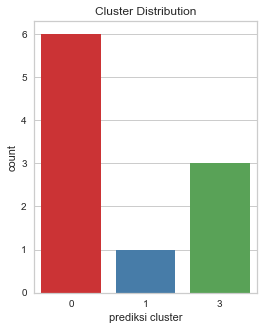

In [98]:
# EDA hasil data inf

plt.figure(figsize=(4, 5))
sns.countplot(data=df_akhir, x='prediksi cluster', palette='Set1')
plt.title('Cluster Distribution')
plt.show()

Terdapat perbedaan hasil dari EDA model dengan EDA data inference. Pada EDA model terdapat 4 cluster, sedangkan pada data inference hanya terdapat 3 cluster, tidak terdapat cluster 2. Hal ini bisa disebabkan karena pada data inference, tidak terdapat nilai-nilai yang masuk ke kategori cluster 2, yaitu memiliki nilai balance sekitar 0-5000, serta nilai purchases, oneoff_purchases, installments_purchases, cash_advance, cash_advance_trx, purchases_trx, credit_limit, payment, minimum_payments yang cukup rendah dan memiliki nilai yang cukup tinggi untuk prc_full_payment. Selain itu cluster 2 memilki data balance frequency sering diupdate, serta sering purchases_frequency, cukup sering melakukan purchases_installments_frequency, serta hampir tidak pernah oneoff_purchases_frequency dan cash_advance_frequency.

## X. Pengambilan Kesimpulan

Berdasarkan data di atas, dapat disimpulkan bahwa:
- Dataset ini terdiri dari 4475 baris dan 18 kolom. Dataset ini memiliki data type float64 dan int64 serta memakan memori sebesar 629.4 KB
- Berdasarkan data perhitungan VIF, terdapat 5 feature yang memiliki nilai di atas 5, yaitu 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASE', 'PURCHASES_FREQUENCY', dan 'PURCHASES_INSTALLMENTS_FREQUENCY'. Sedangkan 12 feature lainnya memiliki nilai di bawah 5, yang berarti feature-feature tersebut tidak saling berkaitan dengan feature lainnya. Maka dapat diprediksi bahwa jika dilakukan reduksi dimensi, maka paling tidak dapat direduksi sampai 13 dimensi.
- Berdasarkan grafik EVR, dapat dilihat bahwa terdapat degradasi nilai EVR yang gradual dari komponen pertama hingga terakhir. Jika dilakukan reduksi dimensi sampai 8 dimensi, kemungkinan 8 komponen merupakan jumlah terbaik dengan cumsum EVR sekitar 80% hingga 90%.
- Nilai cluster yang diperoleh dari elbow method adalah 4, sedangkan untuk silhouette method adalah 3.
- Model KMeans dan Agglomerative Clustering menghasilkan 4 cluster, sedangkan model DBSCAN menghasilkan 2 cluster.
- Berdasarkan visualisasi data 2 dimensi, model terbaik dari ketiga model tersebut adalah  KMeans. Model KMeans memiliki persebaran cluster yang tidak saling tumpah tindih, sedangkan untuk model Agglomerative Clustering dan DBSCAN, dapat dilihat memiliki persebarang cluster yang saling tumpah tindih.



---
## Conceptual Problem
1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

>Inertia adalah jumlah kuadrat jarak antara setiap instance pelatihan dan pusat massa terdekatnya. Inertia mengukur seberapa baik kumpulan data dikelompokkan oleh K-Means. Inertia dihitung dengan mengukur jarak antara setiap titik data dan pusat massanya, mengkuadratkan jaraknya, dan menjumlahkan kuadrat in di satu cluster. Model yang baik adalah model dengan inersia rendah dan jumlah cluster (k) yang rendah.

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll)!

>Elbow Method merupakan salah satu metode untuk menentukan jumlah cluster(k) yang tepat melalui persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik. Tahapan dari elbow method adalah:
>- Menginisialisasi awal nilai k
>- Menaikan nilai k
>- Menghitung hasil sum of square error dari tiap nilai k
>- Analisis hasil sum of square error dari nilai k yang mengalami penurunan secara drastis.

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

>Perbedaan dari masing-masing algoritma clustering yang digunakan adalah:
>- Algoritma KMeans merupakan algoritma  yang berbasis pada centroid. Sedangkan Agglomerative clustering merupakan strategi pengelompokan hirarki yang dimulai dengan setiap objek dalam satu cluster terpisah yang kemudian membentuk cluster yang semakin membesar. Lalu DBSCAN adalah sebuah metode clustering yang membangun area berdasarkan kepadatan yang terkoneksi (density-connected).
>- Pada algoritma KMeans dan Agglomerative Clustering, harus ditentukan terlebih dahulu jumlah cluster (k) yang akan digunakan, sedangkan untuk DBSCAN tidak perlu ditentukan terlebih dahulu jumlah clusternya.
>- Algoritma DBSCAN tahan terhadap data outlier, sehingga tidak masalah jika pada dataset terdapat data outlier, sedangkan KMeans dan Agglomerative Clustering tidak tahan terhadap data outlier.
